# Merged dataset field description

This is a description of fields in the Merged dataset that combines masterlist, issues list and scopus data of each journal until 2020. The Merged dataset is stored in a pickle file from which we can reconstruct a pandas dataframe without loss of information.

    'URL' : JSTOR url for article 
    'author' : Author names recorded by JSTOR
    'title' : Title of article recorded by JSTOR
    'abstract' : abstract recorded by JSTOR nb: this is blank at the moment
    'content_type' : Article type determined during cleaning. Includes MISC for miscellaneous, Reviews, Note, Comment, Rejoinder and Article categorizations
    'issue_url' : url of issue article belongs to on JSTOR
    'pages' : pages as recorded by JSTOR
    'year' : Year of publication recorded by JSTOR
    'volume' : Volume of article recorded by JSTOR
    'number' : issue of article recorded by JSTOR
    'journal' : journal name JSTOR
    'type' : Type of issue determined during cleaning. S for special issue. N for normal issue
    'authorsSCO' : Author names recorded by Scopus
    'titleSCO' : Title recorded by Scopus
    'journalSCO' : Journal name recorded by Scopus
    'DOI' : DOI recorded by scopus
    'affiliations' : affiliations of authors as recorded by scopus
    'abstractSCO' : abstract of article recorded by scopus
    'citations' : citations of article recorded by scopus
    'document type' : Article type recorded by scopus, may differ from that in cleaning
    'index keywords' : from scopus
    'author keywords' : from scopus
    'footnotes' : footnotes scraped from metadata panel.
    'raw' : raw text data scraped from JSTOR metadata panel.
    'citations' : citations scraped from JSTOR metadata panel during data collection. 

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [11]:
Merged=pd.read_pickle("011_merged_proc_scopus_inception_2020.pkl")
Merged['year']=Merged['year'].astype(int)

In [44]:
content_ex=['MISC',  'Discussion', 'Review', 'Review2']
content=['Article', 'Comment', 'Reply', 'Rejoinder']
jid=["aer","ecta","jpe","qje","res"]

In [ ]:

def plot_chart(year_lim, title, field, jids):
        plt.rcParams["figure.figsize"] = (25, 10)
        dta=Merged[(Merged['content_type'].isin(content)==True) 
                   & (Merged['year']>=year_lim)
                   & (Merged['jid'].isin(jids))
                ]['year'].value_counts()
        plt.bar(dta.index,dta, label='Articles', alpha=0.4)
        dta2=Merged[(Merged[field].isnull()==False)&(Merged['content_type'].isin(content)==True) 
                & (Merged['year']>=year_lim)
                & (Merged['jid'].isin(jids))
                ]['year'].value_counts()
        plt.bar(dta2.index, dta2, label='Scopus coverage', alpha=0.4)
        plt.title(title)
        plt.legend()

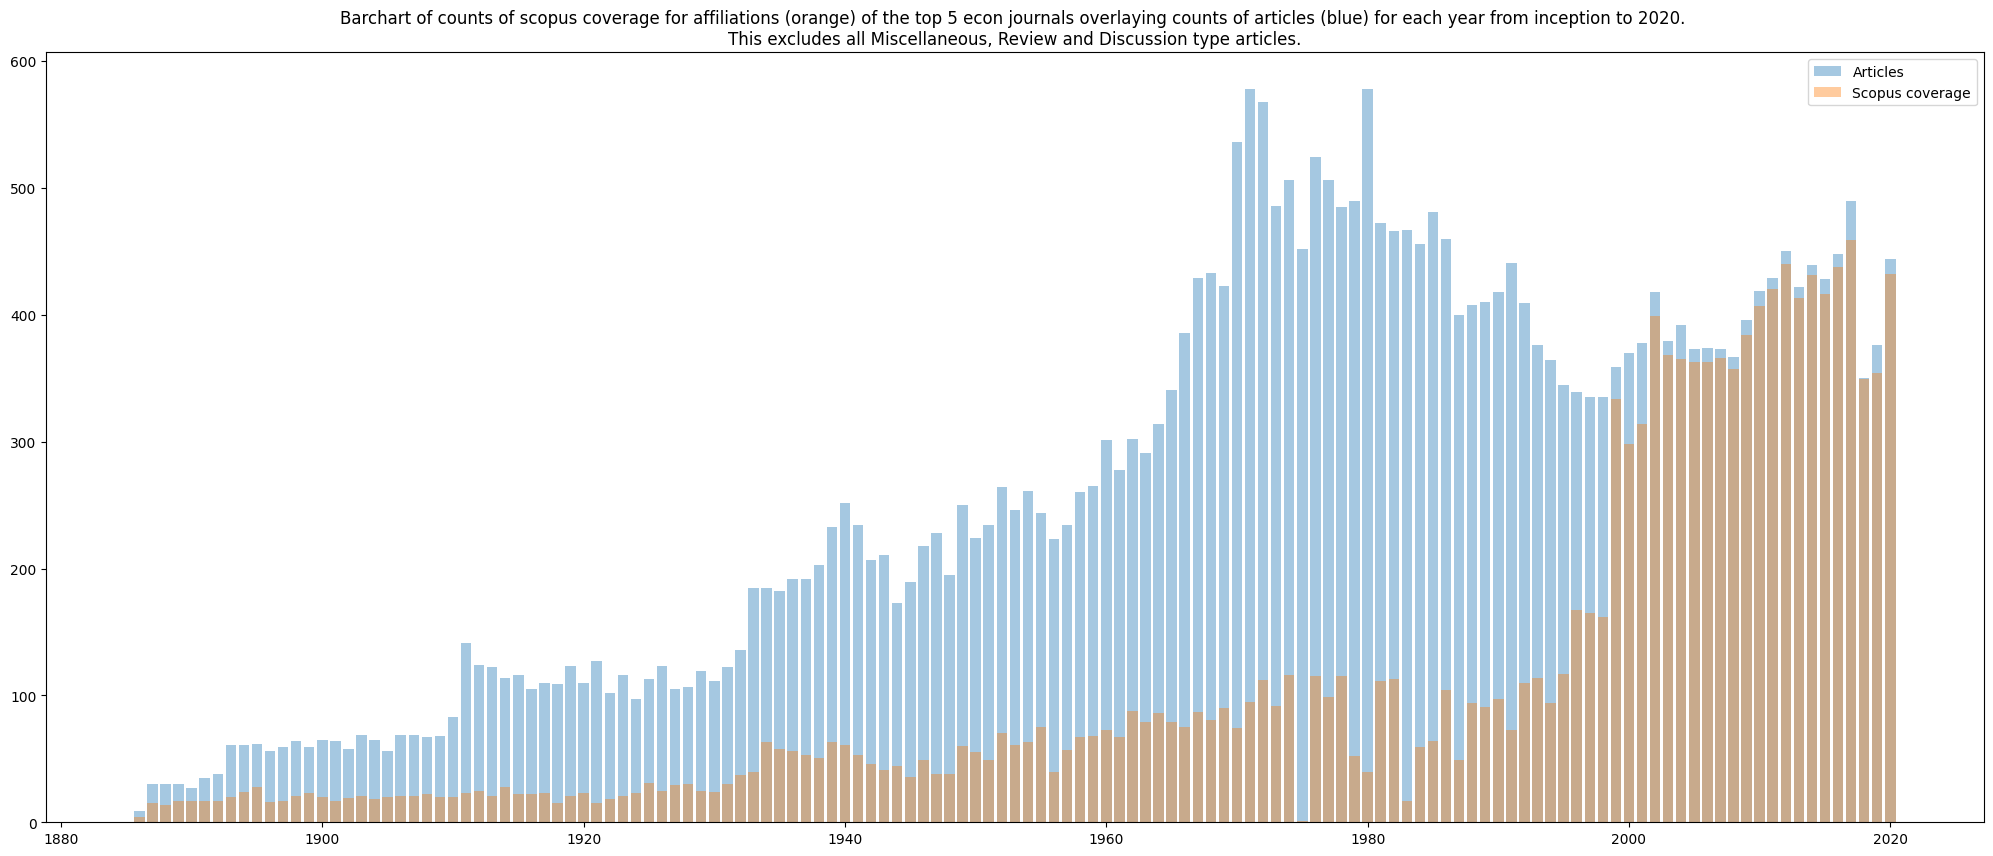

In [50]:
plot_chart(
    1700,
    'Barchart of counts of scopus coverage for affiliations (orange) of the top 5 econ journals overlaying counts of articles (blue) for each year from inception to 2020. \nThis excludes all Miscellaneous, Review and Discussion type articles.',
    "scopus_id",
    ["aer","ecta","jpe","qje","res"]
    )

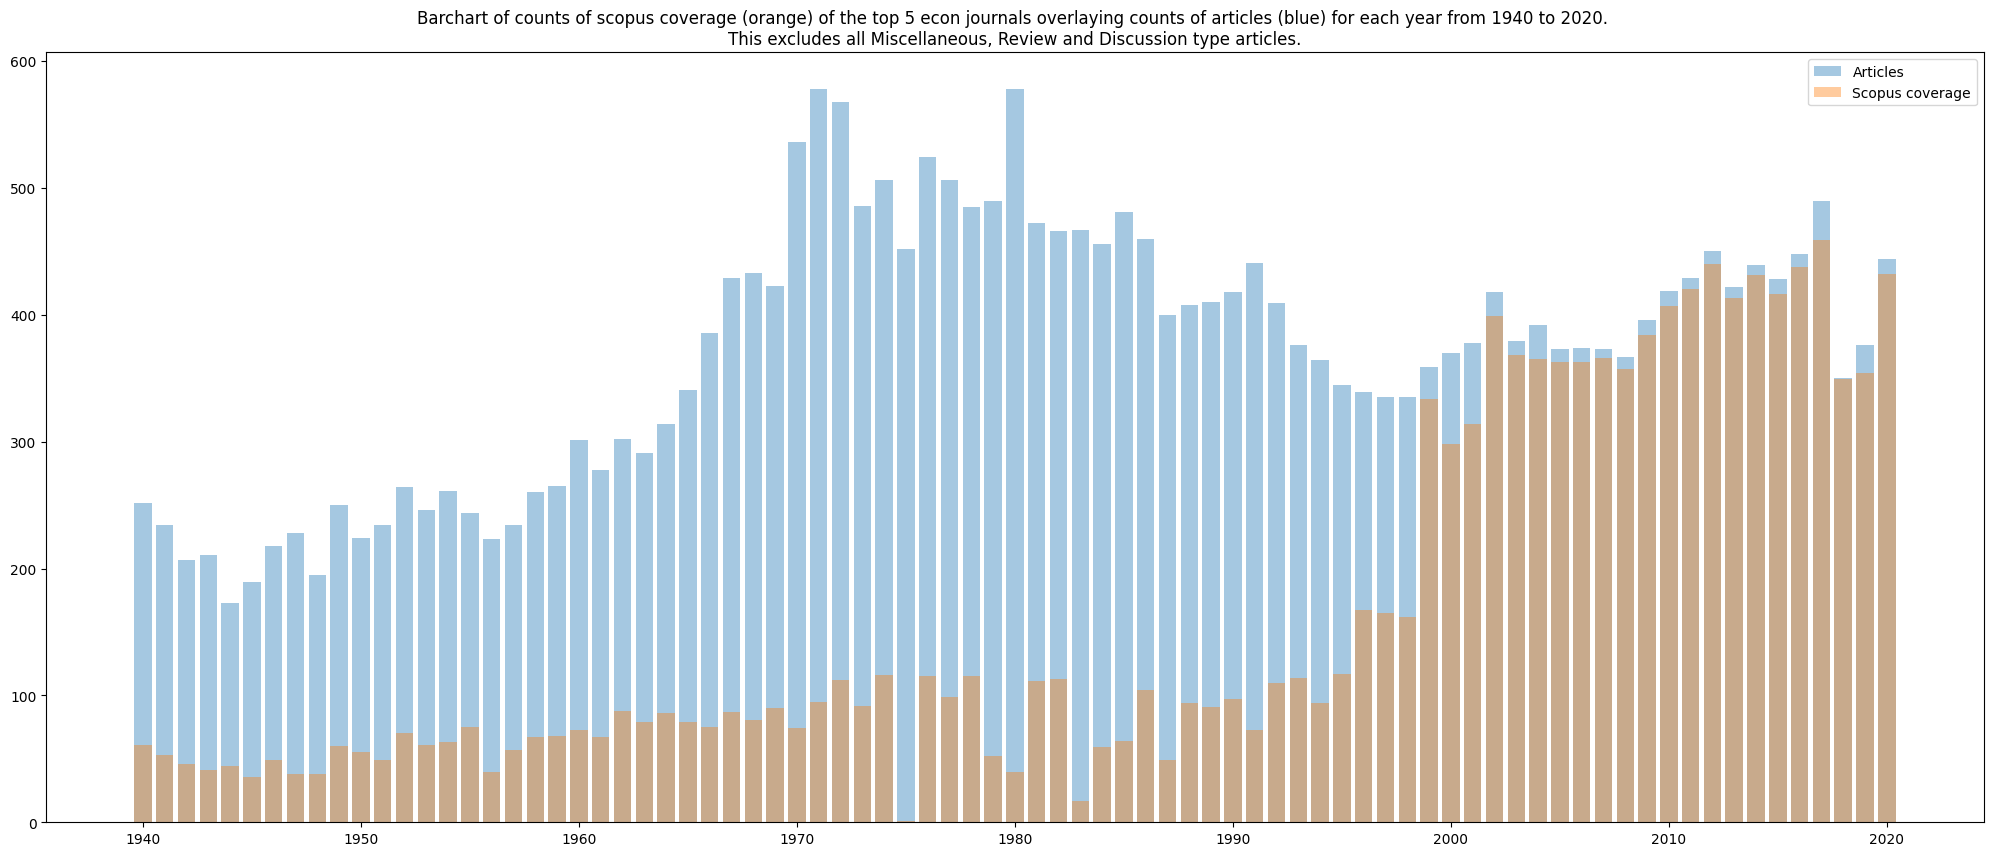

In [51]:
plot_chart(
    1940,
    'Barchart of counts of scopus coverage (orange) of the top 5 econ journals overlaying counts of articles (blue) for each year from 1940 to 2020. \nThis excludes all Miscellaneous, Review and Discussion type articles.',
    "scopus_id",
    ["aer","ecta","jpe","qje","res"]
    )

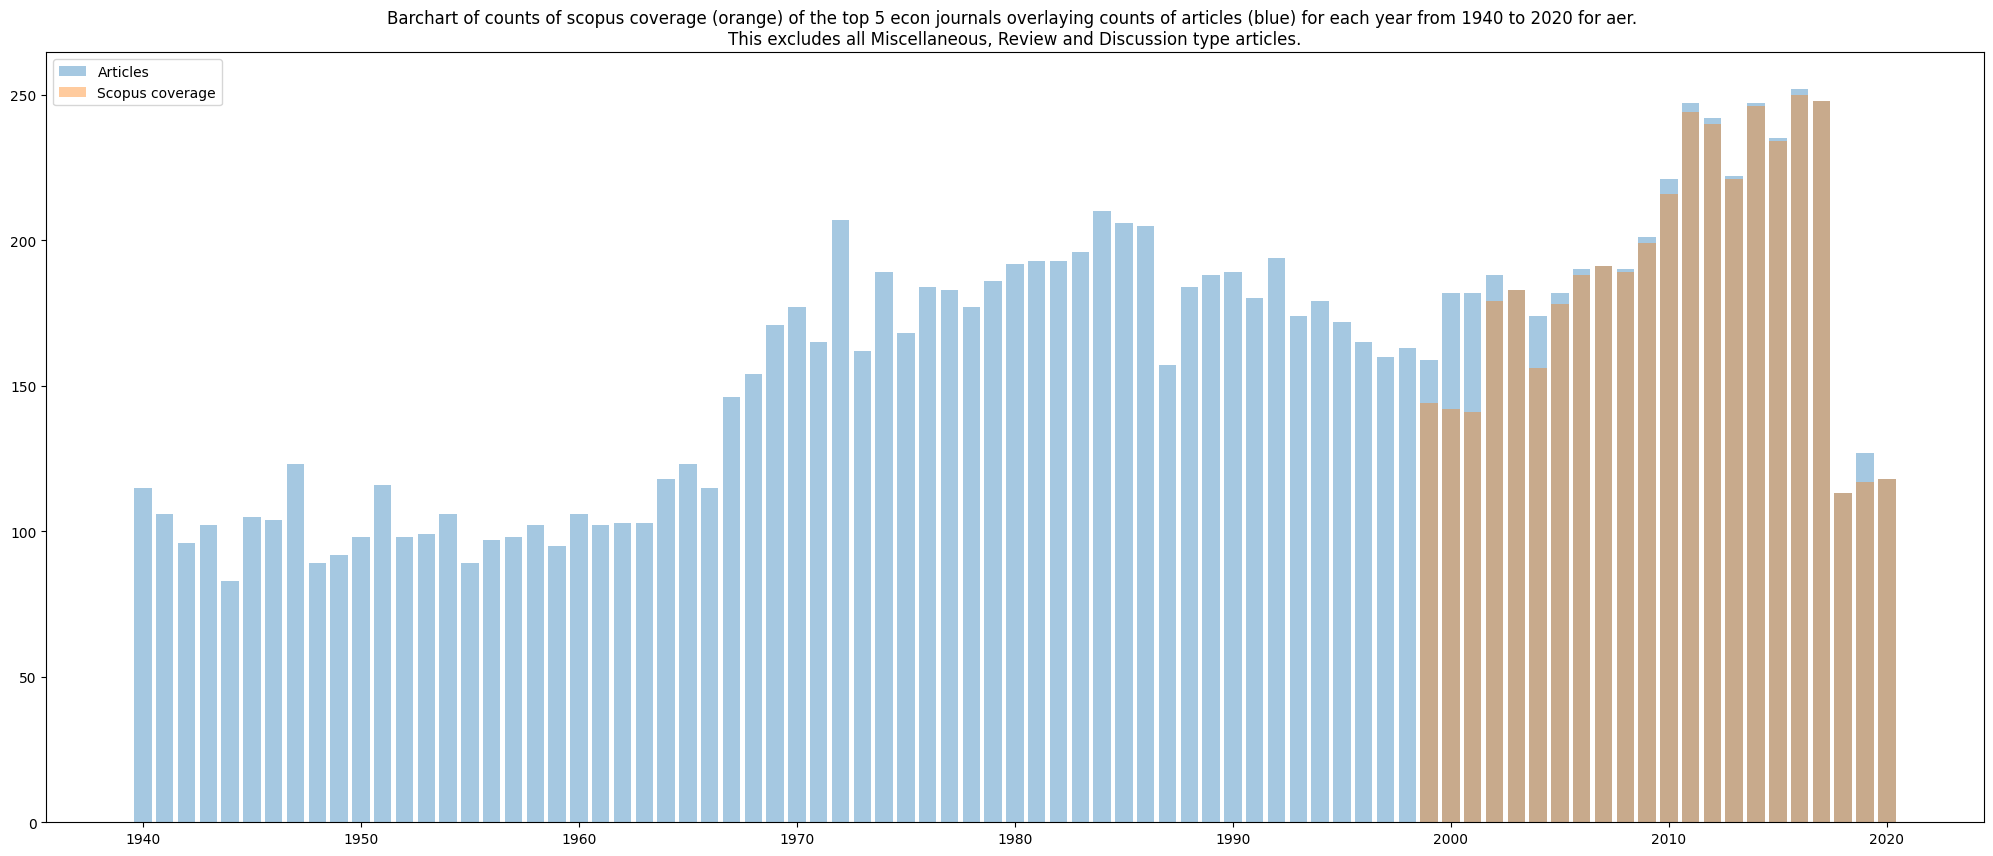

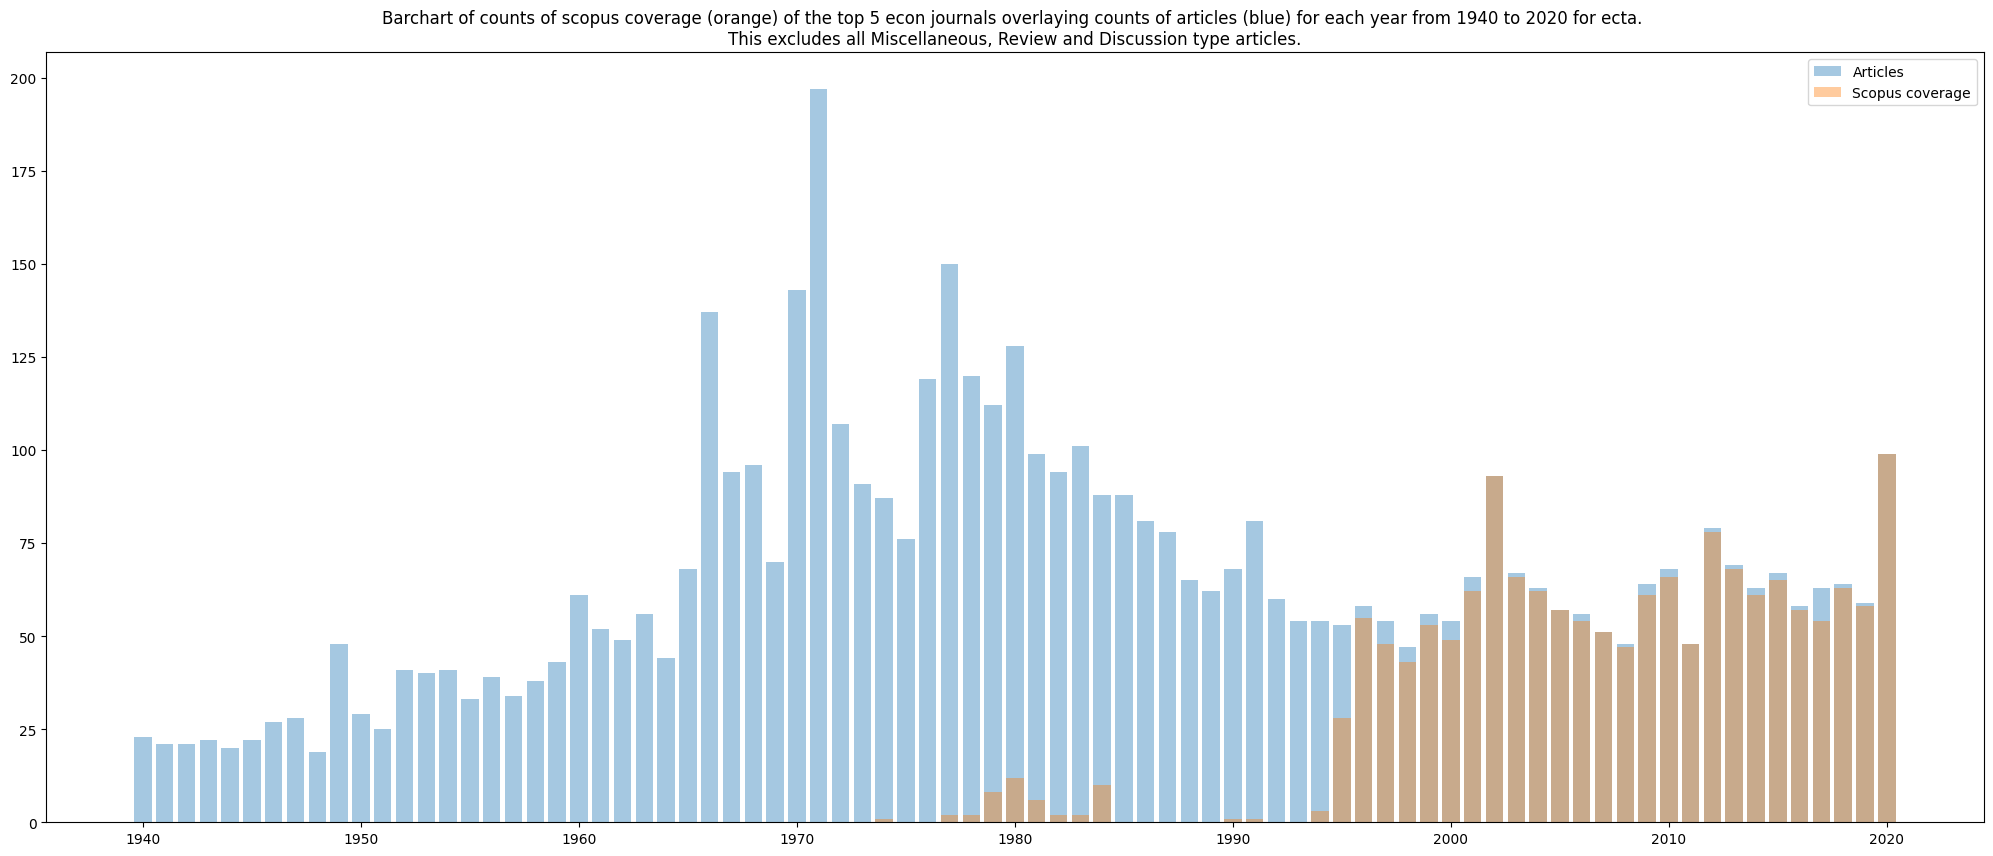

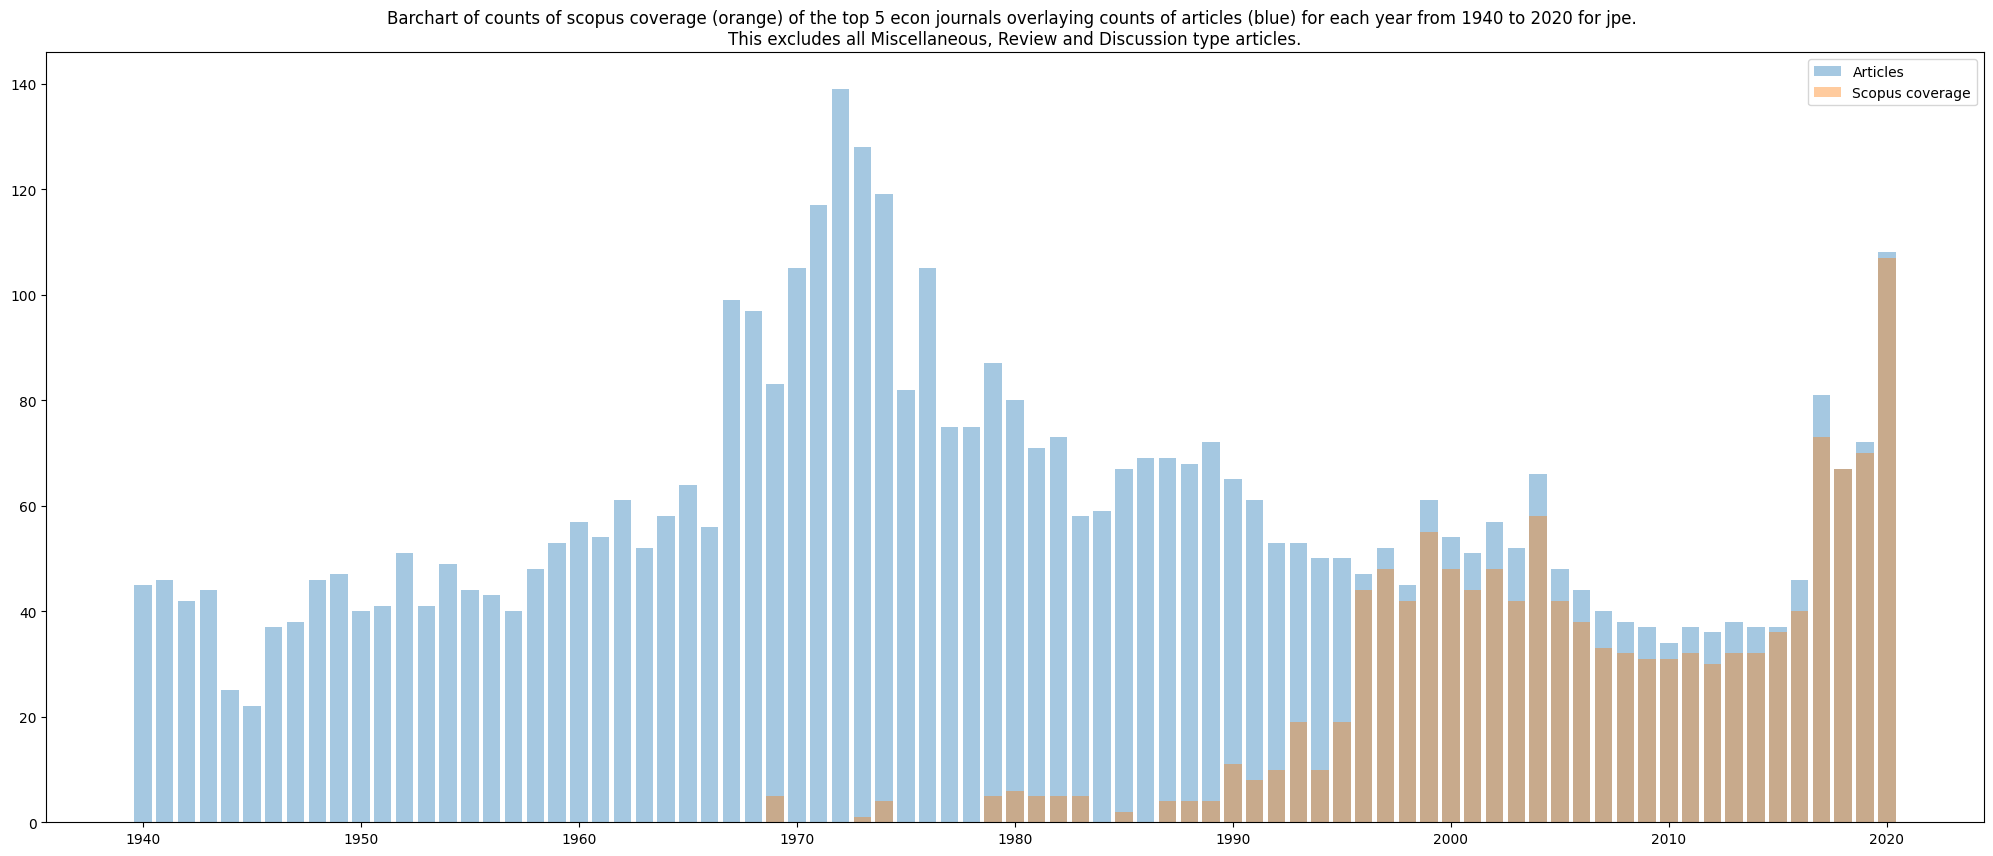

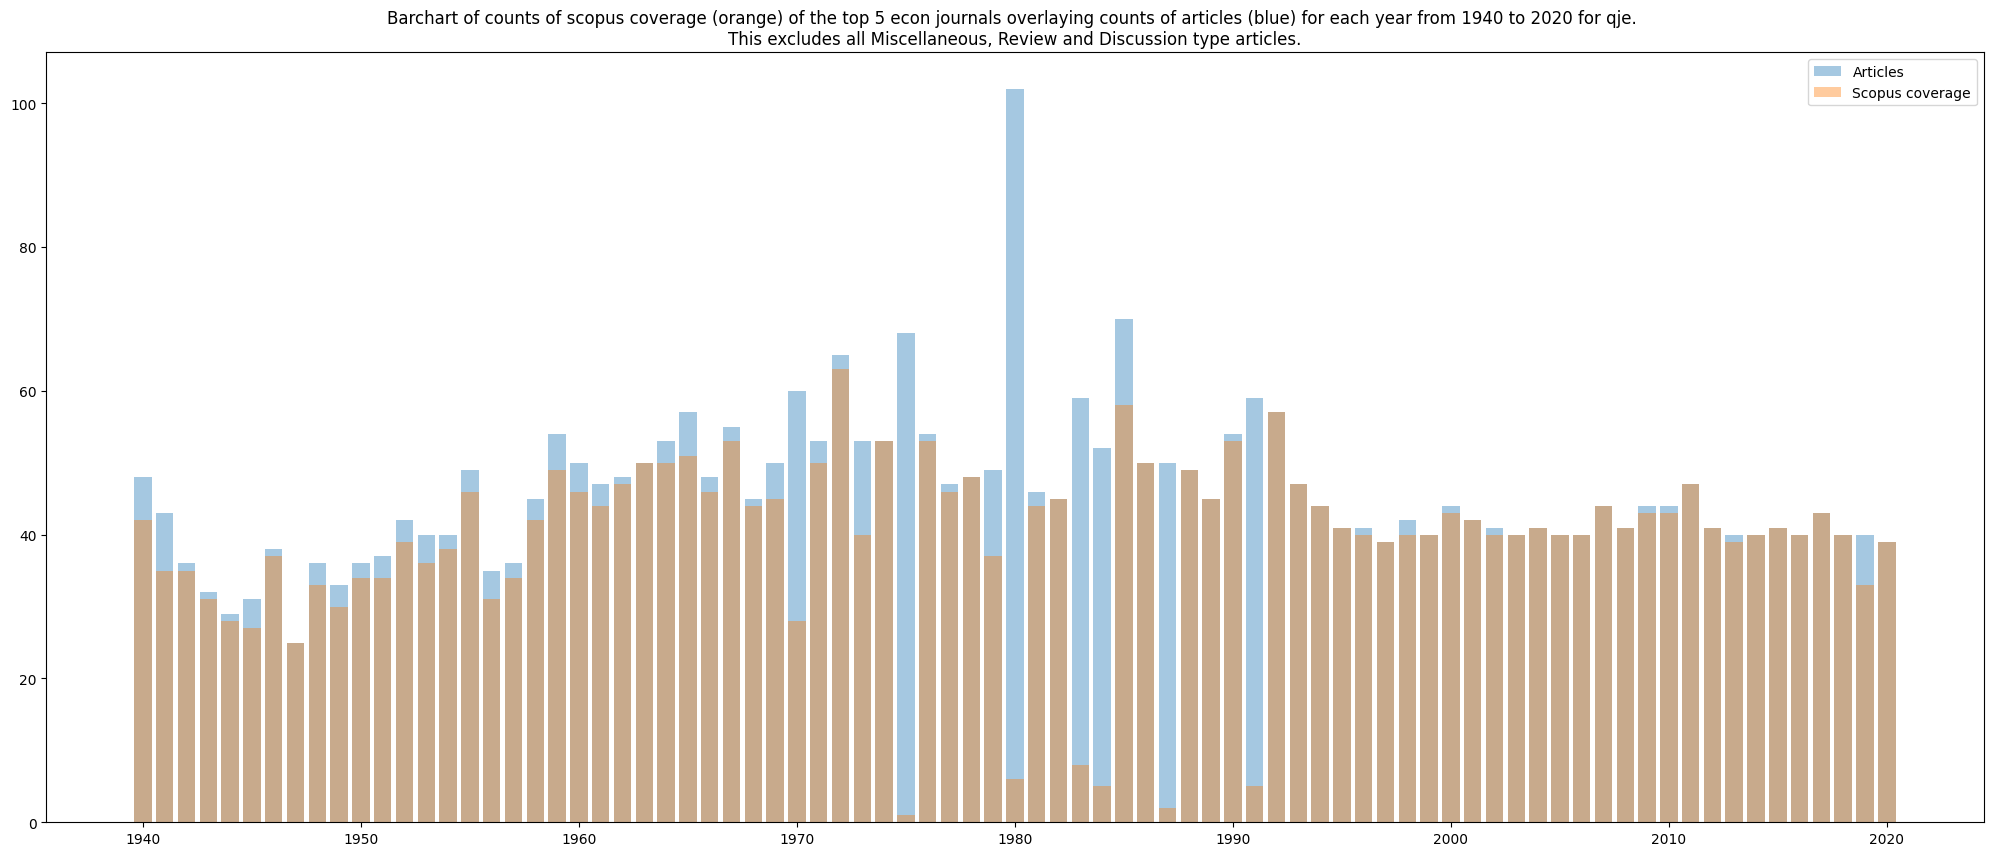

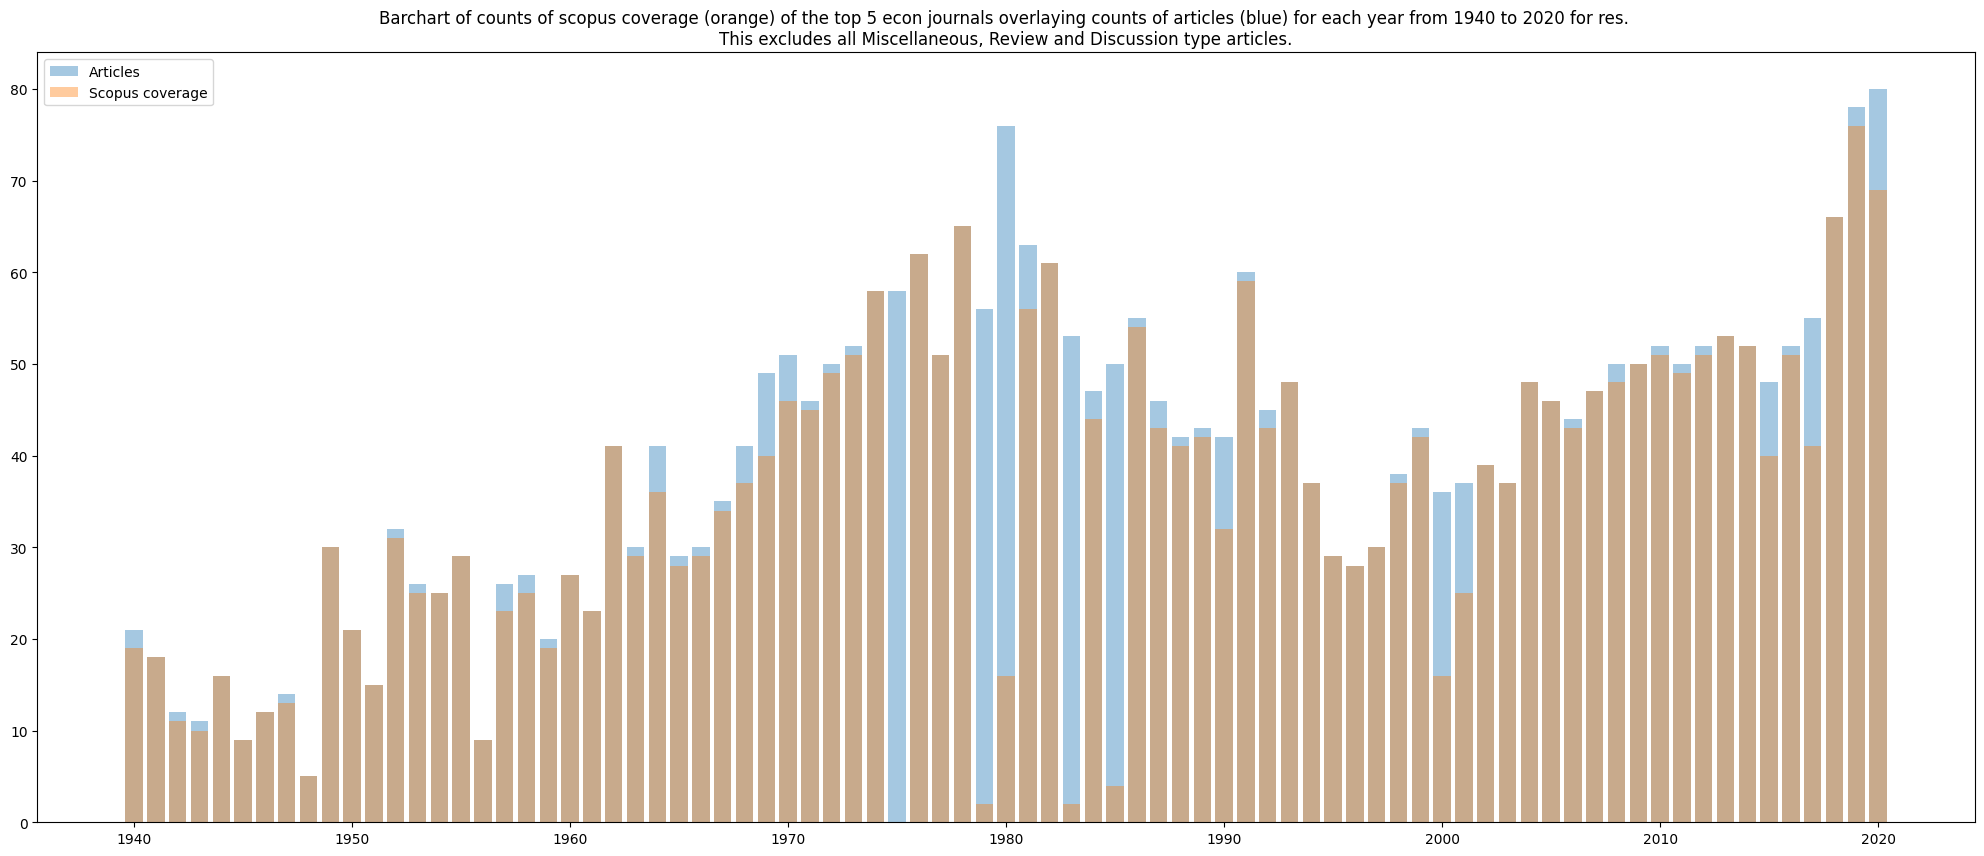

In [52]:
for i in jid:
    plot_chart(
    1940,
    'Barchart of counts of scopus coverage (orange) of the top 5 econ journals overlaying counts of articles (blue) for each year from 1940 to 2020 for '+i+'. \nThis excludes all Miscellaneous, Review and Discussion type articles.',
    "scopus_id",
    [i]
    )